<a href="https://colab.research.google.com/github/dasalgadob/handson-machine-learning/blob/master/Neumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# reconomiento de images de rayos X para detectar neumonia

## Downloading data

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dasalgadob","key":"cc827058d8ada3fe821c934bbb1f7e7e"}'}

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
##downloading data
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 98% 1.13G/1.15G [00:11<00:00, 53.9MB/s]
100% 1.15G/1.15G [00:11<00:00, 107MB/s] 


In [0]:
##checking structure
!ls chest_xray

ls: cannot access 'chest_xray': No such file or directory


In [0]:
!unzip chest-xray-pneumonia.zip > /dev/null
!unzip chest_xray.zip > /dev/null

### Checking the data images

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import shutil
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

Using TensorFlow backend.


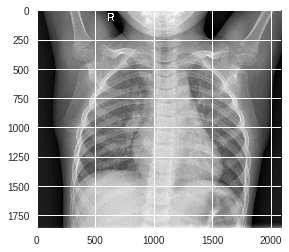

In [0]:
##Normal
img = load_img('chest_xray/train/NORMAL/IM-0115-0001.jpeg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
plt.imshow(img)

In [0]:
print(img)

<PIL.Image.Image image mode=RGB size=2090x1858 at 0x7F091CCB88D0>


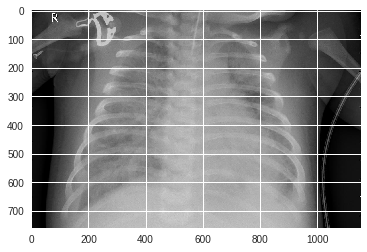

In [0]:
##Neumonia bacteria
img = load_img('chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
plt.imshow(img)

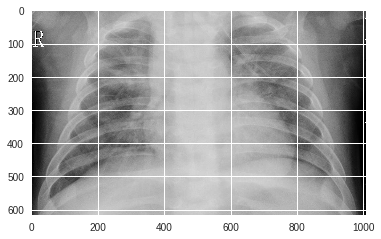

In [0]:
##Neumonia virus
img = load_img('chest_xray/train/PNEUMONIA/person1003_virus_1685.jpeg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
plt.imshow(img)

In [0]:
## mirando cantidad de imagenes de cada carpeta
work_dir=''
test_normal = sorted(os.listdir(os.path.join(work_dir, 'chest_xray', 'test', 'NORMAL')))
print(len(test_normal))
test_neumonia = sorted(os.listdir(os.path.join(work_dir, 'chest_xray', 'test', 'PNEUMONIA')))
print(len(test_neumonia))
train_normal = sorted(os.listdir(os.path.join(work_dir, 'chest_xray', 'train', 'NORMAL')))
print(len(train_normal))
train_neumonia = sorted(os.listdir(os.path.join(work_dir, 'chest_xray', 'train', 'PNEUMONIA')))
print(len(train_neumonia))
val_normal = sorted(os.listdir(os.path.join(work_dir, 'chest_xray', 'val', 'NORMAL')))
print(len(val_normal))
val_neumonia = sorted(os.listdir(os.path.join(work_dir, 'chest_xray', 'val', 'PNEUMONIA')))
print(len(val_neumonia))

234
390
1342
3876
9
9


### Basic Model

In [0]:

image_height, image_width = 128,128
train_dir = os.path.join(work_dir, "chest_xray", 'train')
test_dir = os.path.join(work_dir, "chest_xray", 'test')
no_classes = 2
no_validation = len(test_normal)+ len(test_neumonia) 
epochs = 10
batch_size = 16
no_train = len(train_normal)+ len(train_neumonia) -2
no_test = len(test_normal)+ len(test_neumonia) 
input_shape = (image_height, image_width, 3)
epoch_steps = no_train // batch_size
test_steps = no_test // batch_size
print(epoch_steps)
print(test_steps)

326
39


In [0]:
print(no_train)
print(no_test)

5216
624


In [0]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, image_width, image_height)
else:
    input_shape = (image_width, image_height, 3)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

#model.summary()

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
generator_train = ImageDataGenerator(rescale=1. / 255)
generator_test = ImageDataGenerator(rescale=1. / 255)

In [0]:
train_images = generator_train.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    target_size=(image_width, image_height),
    class_mode='binary'
)

test_images = generator_test.flow_from_directory(
    test_dir,
    batch_size=batch_size,
    target_size=(image_width, image_height),
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [0]:
history= model.fit_generator(
    train_images,
    steps_per_epoch=epoch_steps,
    epochs=epochs,
    validation_data=test_images,
    validation_steps=test_steps)

Epoch 1/10
326/326 [==============================] - 93s 285ms/step - loss: 0.2704 - acc: 0.8942 - val_loss: 1.3957 - val_acc: 0.7147
Epoch 2/10
326/326 [==============================] - 82s 251ms/step - loss: 0.1293 - acc: 0.9578 - val_loss: 0.8443 - val_acc: 0.7756
Epoch 3/10
326/326 [==============================] - 105s 323ms/step - loss: 0.1036 - acc: 0.9664 - val_loss: 1.1798 - val_acc: 0.7388
Epoch 4/10
326/326 [==============================] - 66s 202ms/step - loss: 0.0944 - acc: 0.9695 - val_loss: 1.4307 - val_acc: 0.7644
Epoch 5/10
326/326 [==============================] - 77s 237ms/step - loss: 0.0812 - acc: 0.9734 - val_loss: 1.1895 - val_acc: 0.7484
Epoch 6/10
326/326 [==============================] - 66s 203ms/step - loss: 0.0836 - acc: 0.9739 - val_loss: 1.2115 - val_acc: 0.7644
Epoch 7/10
326/326 [==============================] - 66s 203ms/step - loss: 0.0774 - acc: 0.9776 - val_loss: 1.2462 - val_acc: 0.7532
Epoch 8/10
326/326 [==============================] - 

In [0]:
from sklearn.metrics import classification_report

In [0]:
test_images2 = generator_test.flow_from_directory(
    test_dir,
    batch_size=624,
    target_size=(image_width, image_height),
    class_mode='binary'
)

X, y = test_images2.next()

Found 624 images belonging to 2 classes.


In [0]:
import numpy as np

In [0]:
#for n in pred:
  #print(n)

In [0]:
#print(pred)

In [0]:
pred = model.predict(X, batch_size=16, verbose=1)
#predicted = [np.argmax(pred, axis=1)]
pred[pred>0.5] = 1
pred[pred<=0.5] = 0
report = classification_report(y, pred)
print(report)

624/624 [==============================] - 0s 563us/step
              precision    recall  f1-score   support

         0.0       0.97      0.36      0.52       234
         1.0       0.72      0.99      0.83       390

   micro avg       0.75      0.75      0.75       624
   macro avg       0.84      0.68      0.68       624
weighted avg       0.81      0.75      0.72       624



## Making a deeper model

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 16)        4624      
__________

In [0]:
history= model.fit_generator(
    train_images,
    steps_per_epoch=epoch_steps,
    epochs=10,
    validation_data=test_images,
    validation_steps=test_steps)

Epoch 1/10
326/326 [==============================] - 70s 214ms/step - loss: 0.5434 - acc: 0.7515 - val_loss: 0.4019 - val_acc: 0.8189
Epoch 2/10
326/326 [==============================] - 67s 205ms/step - loss: 0.3079 - acc: 0.8702 - val_loss: 0.4494 - val_acc: 0.8029
Epoch 3/10
326/326 [==============================] - 68s 208ms/step - loss: 0.2131 - acc: 0.9185 - val_loss: 0.6091 - val_acc: 0.8317
Epoch 4/10
326/326 [==============================] - 67s 206ms/step - loss: 0.1745 - acc: 0.9383 - val_loss: 0.3235 - val_acc: 0.8718
Epoch 5/10
326/326 [==============================] - 66s 204ms/step - loss: 0.1602 - acc: 0.9413 - val_loss: 0.4740 - val_acc: 0.8446
Epoch 6/10
326/326 [==============================] - 67s 205ms/step - loss: 0.1445 - acc: 0.9511 - val_loss: 0.3413 - val_acc: 0.8574
Epoch 7/10
326/326 [==============================] - 67s 207ms/step - loss: 0.1388 - acc: 0.9517 - val_loss: 0.8059 - val_acc: 0.7997
Epoch 8/10
326/326 [==============================] - 6

### Tranfer learning Mobile Net

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
import numpy as np
from keras.layers import ZeroPadding2D

In [0]:
top_model_weights_path = 'bottleneck_fc_model.h5'
img_width, img_height= 128, 128
train_data_dir = os.path.join(work_dir, "chest_xray", 'train')
validation_data_dir = os.path.join(work_dir, "chest_xray", 'test')
batch_size = 16
nb_train_samples = len(train_normal)+ len(train_neumonia) -2
nb_validation_samples = len(test_normal)+ len(test_neumonia) 
#image_height, image_width = 128,128





In [0]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [0]:
model = applications.MobileNet(include_top=False, weights='imagenet'
                               , input_shape=(img_width, img_height, 3))

In [0]:
generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)


Found 5216 images belonging to 2 classes.


In [0]:
bottleneck_features_train = model.predict_generator(
    generator, nb_train_samples // batch_size)

In [0]:
np.save('bottleneck_features_train.npy',
        bottleneck_features_train)

In [0]:
generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

Found 624 images belonging to 2 classes.


In [0]:
bottleneck_features_validation = model.predict_generator(
    generator, nb_validation_samples // batch_size)

In [0]:
np.save('bottleneck_features_validation.npy',
        bottleneck_features_validation)

In [0]:
train_data = np.load('bottleneck_features_train.npy')
train_labels = np.array(
    [0] * int(nb_train_samples / 2) + [1] * int(nb_train_samples / 2))

In [0]:
print(train_labels)

[0 0 0 ... 1 1 1]


In [0]:

validation_data = np.load('bottleneck_features_validation.npy')
validation_labels = np.array(
    [0] * int(nb_validation_samples / 2) + [1] * int(nb_validation_samples / 2))

In [0]:

model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(128,128,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [0]:

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
history= model.fit_generator(
    train_images,
    steps_per_epoch=epoch_steps,
    epochs=5,
    validation_data=test_images,
    validation_steps=test_steps)

Epoch 1/5
326/326 [==============================] - 92s 284ms/step - loss: 4.1506 - acc: 0.7396 - val_loss: 5.6718 - val_acc: 0.6442
Epoch 2/5
326/326 [==============================] - 91s 278ms/step - loss: 4.0712 - acc: 0.7446 - val_loss: 6.4383 - val_acc: 0.5962
Epoch 3/5
326/326 [==============================] - 90s 277ms/step - loss: 4.1048 - acc: 0.7425 - val_loss: 5.5441 - val_acc: 0.6522
Epoch 4/5
326/326 [==============================] - 91s 278ms/step - loss: 4.1690 - acc: 0.7385 - val_loss: 6.1572 - val_acc: 0.6138
Epoch 5/5
326/326 [==============================] - 90s 276ms/step - loss: 4.0467 - acc: 0.7462 - val_loss: 6.1317 - val_acc: 0.6154


### Data augmetation

In [0]:


generator_train = ImageDataGenerator(rescale=1. / 255)

In [0]:
train_images = generator_train.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    target_size=(226, 226),
    class_mode='binary'
)

test_images = generator_test.flow_from_directory(
    test_dir,
    batch_size=batch_size,
    target_size=(226, 226),
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [0]:

model = Sequential()
model.add(Conv2D(16, (3, 3),input_shape=(226,226,3)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [0]:

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
print(epoch_steps)
print(batch_size)

326
16


In [0]:
history= model.fit_generator(
    train_images,
    steps_per_epoch=epoch_steps,
    epochs=100,
    validation_data=test_images,
    validation_steps=test_steps)

Epoch 1/100
326/326 [==============================] - 81s 249ms/step - loss: 0.5747 - acc: 0.7395 - val_loss: 0.6921 - val_acc: 0.6234
Epoch 2/100
326/326 [==============================] - 79s 243ms/step - loss: 0.5728 - acc: 0.7427 - val_loss: 0.6781 - val_acc: 0.6362
Epoch 3/100
326/326 [==============================] - 80s 244ms/step - loss: 0.5687 - acc: 0.7446 - val_loss: 0.6884 - val_acc: 0.6282
Epoch 4/100
326/326 [==============================] - 80s 245ms/step - loss: 0.5711 - acc: 0.7433 - val_loss: 0.6960 - val_acc: 0.6122
Epoch 5/100
326/326 [==============================] - 79s 242ms/step - loss: 0.5715 - acc: 0.7425 - val_loss: 0.6910 - val_acc: 0.6266
Epoch 6/100
326/326 [==============================] - 81s 247ms/step - loss: 0.5699 - acc: 0.7442 - val_loss: 0.7025 - val_acc: 0.6218
Epoch 7/100
326/326 [==============================] - 80s 245ms/step - loss: 0.5712 - acc: 0.7439 - val_loss: 0.6988 - val_acc: 0.6282
Epoch 8/100
326/326 [===========================